In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
merchant_category = pd.read_csv('./data/merchant_category_mapping.csv')
merchant_name = pd.read_csv('./data/merchant_name_mapping.csv')
perf_data = pd.read_csv('./data/performance_dataset.csv')

#### Taking a look at the data

##### Overview of the Merchant Category

In [3]:
merchant_category.head()

,category,subcategory,merchant_id
0,WOMENS_FASHION,Women's Clothing Stores - 448120,78986
1,HOME_FURNISHINGS,Furniture Stores - 442110,54871
2,NaN,Women's Clothing Stores - 448120,86469
3,OTHER,Musical Instrument and Supplies Stores - 451140,42719
4,JEWELRY,Jewelry Stores - 448310,40242


##### summary info about the merchant_category dataset

In [4]:
#dimensions
merchant_category.shape

(143, 3)

In [5]:
#get more info on dataset
merchant_category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 3 columns):
category       141 non-null object
subcategory    136 non-null object
merchant_id    143 non-null int64
dtypes: int64(1), object(2)
memory usage: 3.5+ KB


##### summary info about the merchant_name dataset

In [6]:
#dimensions
merchant_name.shape

(143, 2)

In [7]:
merchant_name.head()

,name,merchant_id
0,UCXMYZC,42733
1,OQFYEDO,28833
2,LVMCHQE,83007
3,QIGSCCQ,66431
4,DCZPIEU,61453


##### summary info about the performance dataset

In [8]:
perf_data.shape

(143, 9)

In [9]:
perf_data.head()

,merchant_id,actual_repayment_pct,predicted_repayment_pct,num_trxn,avg_auth_amt,avg_loan_amt,avg_fico,avg_term,avg_apr
0,78986,0.927466,0.948425,6331,491.650278,473.727737,643,8,0.251198
1,54871,0.983798,0.978641,3293,862.996710,862.555109,715,6,0.000000
2,86469,0.936782,0.965042,2670,636.689936,620.229734,664,8,0.214657
3,42719,0.961743,0.945634,570,719.714054,692.877934,655,10,0.257577
4,40242,0.867273,0.902408,317,380.978427,374.832065,626,9,0.160714


##### Note: Data Cleaning is skipped as there are very few missing records in the category and subcategory columns and the rest of the dataset is quite clean

#### Merging the datasets

In [10]:
merchant_category_name = merchant_category.merge(merchant_name, how='left', on='merchant_id')
merchant_category_perf = merchant_category_name.merge(perf_data, how='left', on='merchant_id')
merchant_category_perf.head()

,category,subcategory,merchant_id,name,actual_repayment_pct,predicted_repayment_pct,num_trxn,avg_auth_amt,avg_loan_amt,avg_fico,avg_term,avg_apr
0,WOMENS_FASHION,Women's Clothing Stores - 448120,78986,MYRIFGH,0.927466,0.948425,6331,491.650278,473.727737,643,8,0.251198
1,HOME_FURNISHINGS,Furniture Stores - 442110,54871,ZNCIWJS,0.983798,0.978641,3293,862.996710,862.555109,715,6,0.000000
2,NaN,Women's Clothing Stores - 448120,86469,LYMLCLF,0.936782,0.965042,2670,636.689936,620.229734,664,8,0.214657
3,OTHER,Musical Instrument and Supplies Stores - 451140,42719,ZBCRDNS,0.961743,0.945634,570,719.714054,692.877934,655,10,0.257577
4,JEWELRY,Jewelry Stores - 448310,40242,YOZQTHS,0.867273,0.902408,317,380.978427,374.832065,626,9,0.160714


#### Calculating difference in actual vs. predicted repayment

In [11]:
#get difference between actual and predicted repayment
merchant_category_perf['repayment_diff'] = merchant_category_perf['actual_repayment_pct'] - merchant_category_perf['predicted_repayment_pct']
merchant_category_perf.sample(5)

,category,subcategory,merchant_id,name,actual_repayment_pct,predicted_repayment_pct,num_trxn,avg_auth_amt,avg_loan_amt,avg_fico,avg_term,avg_apr,repayment_diff
97,AUTO_PARTS,Automotive Parts and Accessories Stores - 441310,20531,LHVFRHP,0.705134,0.924981,4,1320.777777,1320.777777,651,11,0.261588,-0.219847
102,JEWELRY,Jewelry Stores - 448310,99859,UBTIOLN,1.000000,0.945118,3,1559.341666,1392.341666,643,11,0.250869,0.054882
25,HOME_FURNISHINGS,Furniture Stores - 442110,13615,EQZTMJX,0.965838,0.972367,59,1899.973205,1827.793846,671,10,0.250371,-0.006530
135,OTHER,Sporting Goods Stores - 451110,23524,OCHXFGA,1.000000,0.966569,1,231.230000,231.230000,768,3,0.272500,0.033431
84,CONSUMER_ELECTRONICS,Business to Business Electronic Markets - 425110,59868,KSIUHKI,1.000000,0.953410,6,300.000000,300.000000,691,10,0.283333,0.046590


In [12]:
avg_repayment_diff = merchant_category_perf['repayment_diff'].agg(['mean'])
avg_repayment_diff

mean   -0.023351
Name: repayment_diff, dtype: float64

#### Checking for correlations

In [13]:
#check correlation between average term and predicted repayment
merchant_category_perf['avg_term'].corr(merchant_category_perf['predicted_repayment_pct'])

0.09652786942545571

In [14]:
#correlation between term and actual repayment
merchant_category_perf['avg_term'].corr(merchant_category_perf['actual_repayment_pct'])

0.09676551501582496

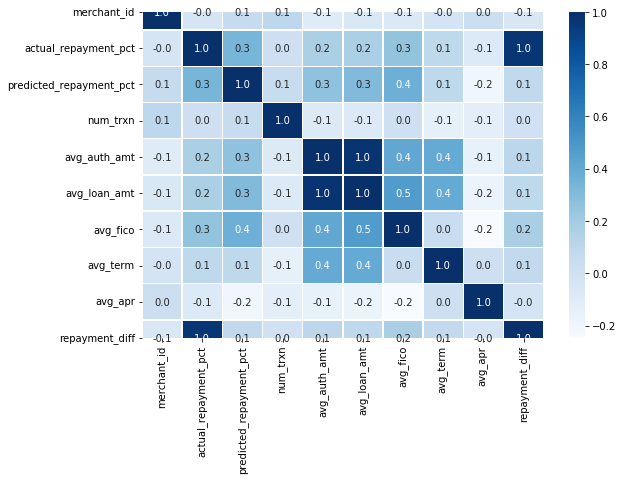

In [15]:
#check correlation between all the variables

import seaborn as sns
corr = merchant_category_perf.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(corr, cmap='Blues', annot=True, fmt='.1f', linewidths=.5, ax=ax)

#### Calculating difference in amounts of loan applied vs approved

In [16]:
merchant_category_perf['loan_diff'] = merchant_category_perf['avg_auth_amt'] - merchant_category_perf['avg_loan_amt']
merchant_category_perf.sample(5)

,category,subcategory,merchant_id,name,actual_repayment_pct,predicted_repayment_pct,num_trxn,avg_auth_amt,avg_loan_amt,avg_fico,avg_term,avg_apr,repayment_diff,loan_diff
110,PERSONAL_SERVICE,All Other Miscellaneous Schools and Instructio...,88583,NLQEXCA,1.000000,0.969118,2,3918.000000,3918.000000,708,12,0.300000,0.030882,0.000000
64,NaN,Electronics Stores - 443142,47147,BUOLYBH,1.000000,0.973467,10,271.865600,271.865600,704,6,0.268394,0.026533,0.000000
98,OTHER,All Other Health and Personal Care Stores - 44...,99898,LPQTVHA,0.913869,0.948104,4,166.872000,166.872000,686,7,0.254000,-0.034235,0.000000
92,WOMENS_FASHION,Women's Clothing Stores - 448120,63702,NDDVOCX,1.000000,0.941055,4,1319.387894,1319.387894,675,9,0.255425,0.058945,0.000000
51,WOMENS_FASHION,Luggage and Leather Goods Stores - 448320,12532,UTNOWGK,1.000000,0.960569,15,1288.755517,1287.422068,691,8,0.231682,0.039431,1.333449


In [17]:
#Get avg loan difference
merchant_category_perf.loan_diff.mean()

72.5594111118881

#### Correlation between loan_diff and average fico score

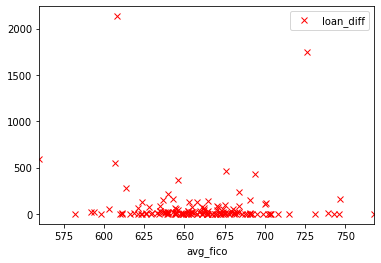

In [18]:
score_and_loan = merchant_category_perf.plot(x='avg_fico', y='loan_diff', style='rx')

In [19]:
#some summary statistics of some key variables
merchant_category_perf[['actual_repayment_pct','predicted_repayment_pct','num_trxn','avg_auth_amt','avg_loan_amt','avg_fico','avg_term','avg_apr']].agg(['min','max','mean','median','std'])

,actual_repayment_pct,predicted_repayment_pct,num_trxn,avg_auth_amt,avg_loan_amt,avg_fico,avg_term,avg_apr
min,0.000000,0.707895,1.000000,79.840000,79.840000,560.000000,3.000000,0.000000
max,1.000000,0.989278,6331.000000,8673.500000,6928.500000,768.000000,12.000000,0.300000
mean,0.915635,0.938986,120.258741,1127.141393,1054.581982,659.601399,9.244755,0.232849
median,0.976093,0.949765,8.000000,843.750000,823.333333,658.000000,9.000000,0.250000
std,0.166605,0.042875,633.062161,1138.127493,1017.087293,33.496508,1.862214,0.064984


#### Investigating where actual repayment exceeds predicted

In [20]:
#where does actual repayment exceeds predicted?
pay_diff = merchant_category_perf[merchant_category_perf.actual_repayment_pct >= merchant_category_perf.predicted_repayment_pct]
pay_diff.head(3)

,category,subcategory,merchant_id,name,actual_repayment_pct,predicted_repayment_pct,num_trxn,avg_auth_amt,avg_loan_amt,avg_fico,avg_term,avg_apr,repayment_diff,loan_diff
1,HOME_FURNISHINGS,Furniture Stores - 442110,54871,ZNCIWJS,0.983798,0.978641,3293,862.996710,862.555109,715,6,0.000000,0.005157,0.441601
3,OTHER,Musical Instrument and Supplies Stores - 451140,42719,ZBCRDNS,0.961743,0.945634,570,719.714054,692.877934,655,10,0.257577,0.016109,26.836120
6,CONSUMER_ELECTRONICS,Elementary and Secondary Schools - 611110,25861,FUGCFOU,0.899819,0.884479,248,271.239637,265.612228,611,9,0.283420,0.015340,5.627409


In [21]:
pay_diff.category.value_counts(normalize=True)

OTHER                   0.471264
HOME_FURNISHINGS        0.183908
JEWELRY                 0.172414
CONSUMER_ELECTRONICS    0.080460
WOMENS_FASHION          0.034483
PERSONAL_SERVICE        0.022989
AUTO_PARTS              0.022989
MENS_FASHION            0.011494
Name: category, dtype: float64

#### Investigating categories where actual repayment is less than predicted

In [22]:
#where does actual repayment exceeds predicted?
merchant_category_perf[merchant_category_perf.actual_repayment_pct < merchant_category_perf.predicted_repayment_pct].category.value_counts(normalize=True)

OTHER                   0.555556
JEWELRY                 0.111111
HOME_FURNISHINGS        0.092593
WOMENS_FASHION          0.092593
CONSUMER_ELECTRONICS    0.074074
AUTO_PARTS              0.055556
BEAUTY                  0.018519
Name: category, dtype: float64

#### Note:
- No noticeable difference in distribution of categories where actual repayment exceeds predicted repayment vs where predicted exceeds actual 
- Therefore, let's look at distribution of overall volume by category
- Categories with higher volume could imply higher demand and for those with low volume, low demand
- The business could increase loan incentives for categories or subcategories with higher loan demand as well as categories struggling with low demand

In [23]:
#distribution of all categories by volume
merchant_category_perf.category.value_counts(normalize = True)

OTHER                   0.503546
HOME_FURNISHINGS        0.148936
JEWELRY                 0.148936
CONSUMER_ELECTRONICS    0.078014
WOMENS_FASHION          0.056738
AUTO_PARTS              0.035461
PERSONAL_SERVICE        0.014184
BEAUTY                  0.007092
MENS_FASHION            0.007092
Name: category, dtype: float64

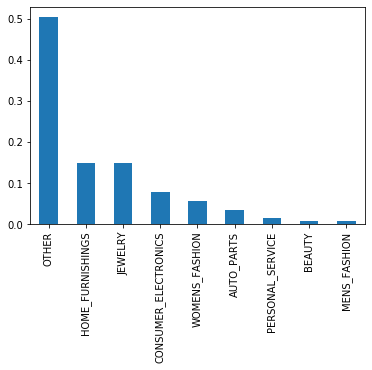

In [24]:
merchant_category_perf.category.value_counts(normalize = True).plot(kind='bar')
plt.show()

In [25]:
top_sub_cat = merchant_category_perf.loc[merchant_category_perf.category.isin(['OTHER','JEWELERY','HOME_FURNISHINGS'])]
top_sub_cat.subcategory.value_counts(normalize=True)

Furniture Stores - 442110                                                     0.220930
All Other Health and Personal Care Stores - 446199                            0.162791
Musical Instrument and Supplies Stores - 451140                               0.116279
Sporting Goods Stores - 451110                                                0.116279
Jewelry Stores - 448310                                                       0.069767
Electronics Stores - 443142                                                   0.058140
Clothing Accessories Stores - 448150                                          0.034884
Hobby, Toy, and Game Stores - 451120                                          0.034884
Service Establishment Equipment and Supplies Merchant Wholesalers - 423850    0.023256
Security Systems Services (except Locksmiths) - 561621                        0.023256
All Other Miscellaneous Schools and Instruction - 611699                      0.011628
Electrical Contractors and Other Wiring Ins

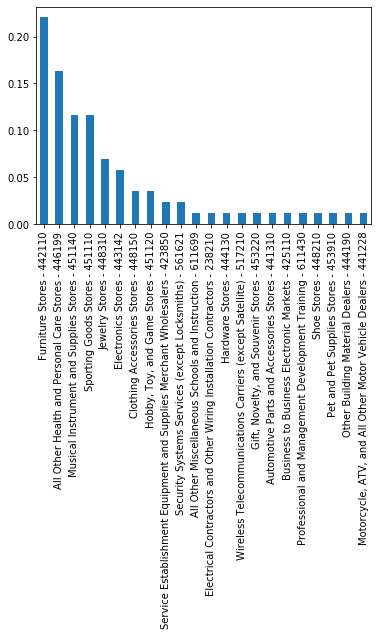

In [26]:
top_sub_cat.subcategory.value_counts(normalize=True).plot(kind='bar')
plt.show()

#### Note:
- Of the top three categories, only 4 subcategories make up 60% of the entire volume

#### Investigating categories with lowest volume

In [27]:
low_sub_cat = merchant_category_perf.loc[merchant_category_perf.category.isin(['BEAUTY','MENS_FASHION'])]
low_sub_cat.subcategory.value_counts(normalize=True)

Cosmetics, Beauty Supplies, and Perfume Stores - 446120    0.5
Clothing Accessories Stores - 448150                       0.5
Name: subcategory, dtype: float64

#### Note: 
- In the categories with the lowest volume, there are only two subcategories, with equal distribution
- The business could drop these two categories
- Alternatively, the business could try and boost volume in these struggling categories, as there are only two of them

#### Investigating term of loan

In [28]:
merchant_category_perf.avg_term.agg(['min','mean','median','max','std'])

min        3.000000
mean       9.244755
median     9.000000
max       12.000000
std        1.862214
Name: avg_term, dtype: float64

In [29]:
#Investigating categories where average term is higher than mean

long_loans = merchant_category_perf[merchant_category_perf.avg_term >9.24]
long_loans.category.value_counts(normalize=True)

OTHER                   0.455882
HOME_FURNISHINGS        0.220588
JEWELRY                 0.176471
AUTO_PARTS              0.058824
CONSUMER_ELECTRONICS    0.044118
WOMENS_FASHION          0.029412
PERSONAL_SERVICE        0.014706
Name: category, dtype: float64

#### Do merchants with longer term loans have a higher repayment than those with short term loans?

In [30]:
round(long_loans.actual_repayment_pct.mean(),2)

0.93

In [31]:
short_loans = merchant_category_perf[merchant_category_perf.avg_term <9.24]
round(short_loans.actual_repayment_pct.mean(),2)

0.9

#### Note: 
- Merchants who take long term loans have a 3% higher average repayment rate than those with short term loans